### Midterm

__1.a)__ Noise Figure: $3dB$

In [2]:
F = 10 ** (3/10)

F

1.9952623149688795

$F \approx 2$

\begin{equation}
F = \dfrac{e_{ns}^2 + e_n^2 + R_s^2 i_n^2}{e_{ns}^2}
\end{equation}

\begin{equation}
e^2_{ns} = 4 k T R_s \\
4 k T R_s = \frac{e^2_n + R^2_s i^2_n}{F-1}
\end{equation}

\begin{equation}
F-1 = 2 - 1 = 1 \\
400 k T  = e^2_n + 100^2 i^2_n \\
400 k T - 100^2 i^2_n = e^2_n \\
40000 k T = e^2_n + 10000^2 i^2_n \\
40000 k T = 400 k T -100^2 i^2_n + 10000^2 i^2_n \\
(40000-400)kT = i^2_n(10000^2-100^2) \\
\frac{(40000-400)kT}{(10000^2-100^2)}=i^2_n
\end{equation}

In [3]:
import numpy as np

k = 1.38e-23
T = 300
kT = k * T

i_n2 = (40000-400)*k*T/(10000**2-100**2)
e_n2 = 400*k*T - 100**2*i_n2

display(f'i_n2 {np.sqrt(i_n2)} e_n2 {np.sqrt(e_n2)}')

'i_n2 1.2804702106632703e-12 e_n2 1.2804702106632704e-09'

__1.b)__

In [4]:
R_opt = np.sqrt(e_n2/i_n2)

R_opt

1000.0000000000001

In [5]:
e_nmin2 = 4*k*T*R_opt + e_n2 + i_n2 * R_opt
F_min = e_nmin2/(4*k*T*R_opt)
N_min = 10 * np.log10(F_min)

display(f'F_min {F_min} N_min {N_min}dB')

'F_min 1.099108910891089 N_min 0.41040728870705223dB'

__1.c)__

In [6]:
f_c = 1000
f = 100
e_n2_tot = e_nmin2*(1+f_c/f)   # total noise voltage density

F_tot = e_n2_tot / (4*k*T*R_opt)

NF_tot = 10 * np.log10(F_tot)

display(f'F_tot {F_tot} NF_tot {NF_tot}dB')

'F_tot 12.09019801980198 NF_tot 10.824334140289302dB'

__2.a)__

In [7]:
e_na_a = 10e-9
i_na_a = 10e-12
R_opt_a = e_na_a / i_na_a

e_na_b = 5e-9
i_na_b = 0.5e-12
R_opt_b = e_na_b / i_na_b

display(f'R_opt_a {R_opt_a} R_opt_b {R_opt_b}')

'R_opt_a 1000.0000000000001 R_opt_b 10000.0'

R_opt_a happens to be $1k\Omega$ which is $R_s$ so I would choose opamp A to minimize the noise figure. However this decision would not be fully informed without considering the total noise.

__2.b)__

- Noise from $R_i$ sees the structure as an inverting amplifier. 
- Noise from $R_f$ appears unamplified at the output.
- Voltage noise from the opamp sees the structure as a non-inverting amplifier.
- Current noise from the amplifier manifests as voltage through $R_f$
- Noise from the source sees the structure as a non-inverting amplifier.
- Since in practice this is a non-inverting amplifier, we input refer by $1 + \frac{R_f}{R_i}$



In [8]:
e_na_c = 2e-9
i_na_c = 1e-12
R_i = 500
R_f = 4500
R_s = 1000

e_ns2 = 4 * kT * R_s

e_n_Ri = np.sqrt(4*kT*R_i)
e_n_Rf = np.sqrt(4*kT*R_f)

e_n_Ri_out = (R_f / R_i) * e_n_Ri  # noise doesn't care about sign, so drop '-'
e_n_Rf_out = e_n_Rf
e_na_c_out = (1+ R_f/R_i) * e_na_c
e_na_c_i_out = R_f*i_na_c
e_ns_out = (1+ R_f/R_i) * np.sqrt(4*kT*R_s)

e_n_tot_out = np.sqrt(e_n_Ri_out**2 + e_n_Rf_out**2 + e_na_c_out**2 + e_na_c_i_out**2 + e_ns_out**2)
F = e_n_tot_out / e_ns_out

NF = 10 * np.log10(F)

display(f'e_n_Ri_out {e_n_Ri_out}')
display(f'e_n_Rf_out {e_n_Rf_out}')
display(f'e_na_c_out {e_na_c_out}')
display(f'e_na_c_i_out {e_na_c_i_out}')
display(f'e_ns_out {e_ns_out}')
display(f'e_n_tot_out {e_n_tot_out}')
display(f'F {F} NF {NF}dB')

'e_n_Ri_out 2.5897490225888686e-08'

'e_n_Rf_out 8.632496741962896e-09'

'e_na_c_out 2e-08'

'e_na_c_i_out 4.5e-09'

'e_ns_out 4.0693979898751605e-08'

'e_n_tot_out 5.311732297471325e-08'

'F 1.3052870008505304 NF 1.157060129629692dB'

__2.c)__

References:
- [Renesas OpAmp application note](https://www.renesas.com/us/en/document/apn/r13an0010-noise-calculations-op-amp-circuits?language=en)
- [Analog OpAmp Noise Relationships](https://www.analog.com/media/en/training-seminars/tutorials/MT-048.pdf)


\begin{equation}
SNR = 20 \log_{10}\dfrac{v_{sig(rms)}}{v_{n,in(rms)}}
\end{equation}


$$f_H = \frac{f_T}{G_n}$$

Where $G_n$ is the noise gain $1+\frac{R_f}{R_i}$

The total rms noise will be the sum of two integrals: 1/f noise integrated from $1Hz$ to $f_c$ and white noise integrated from $f_c$ to $f_{H}$. The input signal is sinusoid. As such, its rms value does not depend on frequency and is simply $v_a \frac{1}{\sqrt{2}}$. One takeaway from the signal frequency is, unless the OpAmp has a very low open loop gain, the signal will not be attenuated by the bandwidth limit of the OpAmp.

Note that a simplifying assumption is made that we only consider noise from 1Hz upwards as in the lecture example. Without doing this, the integral for the flicker noise evaluates to $\infty$

\begin{equation}
e^2_{nf} = e_n^2 \frac{f_c}{f} \\
v^2_{nf,rms} = \int^{f_c}_1 e_n^2 \frac{f_c}{f} df \\
v_{nf,rms} = e_n \sqrt{f_c} \sqrt{\int^{f_c}_1 \frac{1}{f}} df \\
v_{nf,rms} = e_n \sqrt{f_c} \sqrt{ln \frac{f_c}{1}}
\end{equation}

\begin{equation}
v_{nw,rms} = \sqrt{e^2_n f_H} = e_{n}\sqrt{f_H-f_c}
\end{equation}

\begin{equation}
v_{n,rms} = \sqrt{e^2_n f_c ln(f_c) + e^2_n (f_H-f_c)} = \sqrt{e^2_n (f_c ln(f_c) + (f_H-f_c))}\\
v_{n,in(rms)} = \sqrt{\frac{e^2_n (f_c ln(f_c) + (f_H-f_c))}{G^2_n}}\\
v_{n,in(rms)} = \frac{e_n}{G_n}\sqrt{f_c ln(f_c) + (f_H-f_c)}
\end{equation}

In [9]:
f_T = 10e6
G_n = 1 + R_f/R_i
f_H = f_T / G_n
f_c = 10e3
v_a = 1e-3

v_nf_rms = e_n_tot_out * np.sqrt(f_c) * np.sqrt(np.log(f_c))
v_n_in_rms = (e_n_tot_out / G_n) * np.sqrt(f_c * np.log(f_c) + f_H - f_c)
v_in_rms = v_a / np.sqrt(2)

SNR = 20 * np.log10(v_in_rms/v_n_in_rms)

display(f'G_n {G_n}')
display(f'e_n_tot_out {e_n_tot_out}')
display(f'v_nf_rms {v_nf_rms}')
display(f'v_n_in_rms {v_n_in_rms}')
display(f'v_in_rms {v_in_rms}')
display(f'SNR {SNR}dB')

'G_n 10.0'

'e_n_tot_out 5.311732297471325e-08'

'v_nf_rms 1.6120333384428565e-05'

'v_n_in_rms 5.525486990686995e-06'

'v_in_rms 0.0007071067811865475'

'SNR 42.142288828624dB'

__3.a)__

Assuming for a moment that the noise due to the BJT stage is $0$. Since it will be $1\%$ in part c), this is a reasonable assumption.

$$e^2_{nd} = 4kT\frac{2}{3}\frac{1}{g_m}$$


In [11]:
e_n = 3e-9
I_D = 400e-6
e_n2 = e_n**2
g_m = 8*kT/3/e_n2
g_m_over_I_D = g_m / I_D

display(f'g_m / I_D = {g_m_over_I_D}')

'g_m / I_D = 3.0666666666666664'

__3.b)__

\begin{equation}
A_v =  g_m R_D \\
R_D = \frac{A_v}{g_m}
\end{equation}

\begin{equation}
e^2_n = \frac{i^2_{nd}}{g^2_m} + \frac{e^2_{nRD}}{A^2_v} \\
e^2_{nd} = 4kT\frac{2}{3}\frac{1}{g_m} = \frac{i^2_{nd}}{g^2_m}\\
e^2_{nRD} = 4kTR_D
\end{equation}

\begin{equation}
e^2_n = \frac{8kT}{3g_m} + \frac{4kTR_D}{A^2_v} \\
e^2_n = \frac{8kT}{3g_m} + \frac{4kTR_D}{A^2_v} \\
e^2_n = \frac{8kT}{3g_m} + \frac{4kT}{A^2_v} \frac{A_v}{g_m}\\
e^2_n = \frac{8kT}{3g_m} + \frac{4kT}{A_vg_m}\\
e^2_n = \frac{1}{g_m}\left( \frac{8kT}{3} + \frac{4kT}{A_v}\right)\\
g_m = \frac{4kT}{e^2_n}\left( \frac{2}{3} + \frac{1}{A_v}\right)
\end{equation}

In [23]:
e_n = 1e-9
A_v = 10**(20/20)
gamma = 2/3
g_m = (4 * kT / e_n**2)*(gamma + 1/A_v)

I_D = g_m / g_m_over_I_D
R_D = A_v / g_m
V_DD = I_D*R_D

display(f'I_D {I_D} R_D {R_D} V_DD {V_DD}')

'I_D 0.00414 R_D 787.6496534341527 V_DD 3.260869565217392'

__3.c)__

\begin{equation}
\beta = 200 \rightarrow I_E = I_C + I_B = I_C + \frac{I_C}{\beta}\approx I_C\\
v_{out} = g_m v_{in} R_C \\
g_m = \frac{I_C}{V_T} \\
R_C = \frac{V_{EE}}{I_C}\\
A_v = \frac{v_{out}}{v_{in}} = \frac{g_m v_{in} R_C}{v_{in}} = g_m R_C = \frac{I_CR_C}{V_T} = \frac{I_C\frac{V_{EE}}{I_C}}{V_T} = \frac{V_{EE}}{V_T}\\
V_{EE} = A_v V_T\\
i^2_{nc} = 2 q I_C \\
e^2_{nR_C} = 4 k T R_C = 4 k T \frac{V_{EE}}{I_C} \\
e^2_n = \frac{i^2_{nc}}{g^2_m} + \frac{e^2_{nR_C}}{A^2_v} \\
e^2_n = \frac{2 q I_C}{\frac{I^2_C}{V^2_T}} + \frac{4 k T}{\frac{V^2_{EE}}{V^2_T}}\frac{V_{EE}}{I_C}
\end{equation}

\begin{equation}
e^2_n = \frac{2qV^2_T}{I_C} + \frac{4kTV^2_T}{V_{EE}I_C}\\
\frac{e^2_n}{2V^2_T} = \frac{1}{I_C}\left(q + \frac{2kT}{V_{EE}} \right)\\
I_C= \frac{2V^2_T}{e^2_n}\left(q + \frac{2kT}{V_{EE}} \right)  \\
\end{equation}

In [30]:
k = 1.38e-23    # Boltzmann constant (physical constant)
T = 300         # absolute temperature
q = 1.6e-19     # charge of an electron 
V_T = k*T/q     # thermal voltage
e_nbjt = 1e-9

A_v = 10 **(20/20) # 20dB = 1:10
V_EE = A_v * V_T

I_C = (q + 2 * kT / V_EE) * 2 * V_T**2 / e_nbjt**2
R_C = V_EE / I_C

display(f'I_C {I_C} R_C {R_C}')

'I_C 0.000257094 R_C 1006.4412238325284'

Second approach without using $V_{DD}$:

\begin{equation}
v_{out} = g_m v_{in} R_C \\
g_m = \frac{I_C}{V_T} \\
A_v = \frac{v_{out}}{v_{in}} = \frac{g_m v_{in} R_C}{v_{in}} = g_m R_C = \frac{I_CR_C}{V_T}\\
I_C = \frac{A_vV_T}{R_C}\\
g_m = \frac{A_vV_T}{R_C}\frac{1}{V_T} = \frac{A_v}{R_C}\\
i^2_{nc} = 2 q I_C \\
e^2_{nR_C} = 4 k T R_C \\
e^2_n = \frac{i^2_{nc}}{g^2_m} + \frac{e^2_{nR_C}}{A^2_v} \\
\end{equation}

\begin{equation}
e^2_n = 2 q \frac{A_vV_T}{R_C} \frac{R^2_C}{A^2_v} + \frac{4kTR_C}{A^2_v} = 2 q \frac{R_CV_T}{A_v} + \frac{4kTR_C}{A^2_v}\\
e^2_n = \frac{2R_C}{A_v} \left(qV_T + \frac{2kT}{A_v} \right) \\
\frac{e^2_n A_v}{2} = R_C \left(qV_T + \frac{2kT}{A_v} \right) \\
R_C = \frac{e^2_n A_v}{2qV_T + \frac{4kT}{A_v}}
\end{equation}

In [32]:
R_C = e_nbjt**2 * A_v / (2 * q * V_T + 4 * kT / A_v)
I_C = A_v * V_T / R_C

display(f'I_C {I_C} R_C {R_C}')

'I_C 0.00025709400000000003 R_C 1006.4412238325283'

__4.a)__

The problem calls for using unbalanced operation for the noise analysis. I am interpreting this to mean: use unbalanced operation for small signal analysis but balanced operation for DC analysis is allowed.

\begin{equation}
\frac{g_m}{I_D} = \frac{g_m}{I_{TAIL} / 2} \\
g_m = \frac{g_m}{I_D}\frac{2} {I_{TAIL}}
\end{equation}

Using [T model](https://leachlegacy.ece.gatech.edu/ece3050/notes/jfet/thejfet.pdf) instead of hybrid $\pi$ model seems easier for this amplifier.

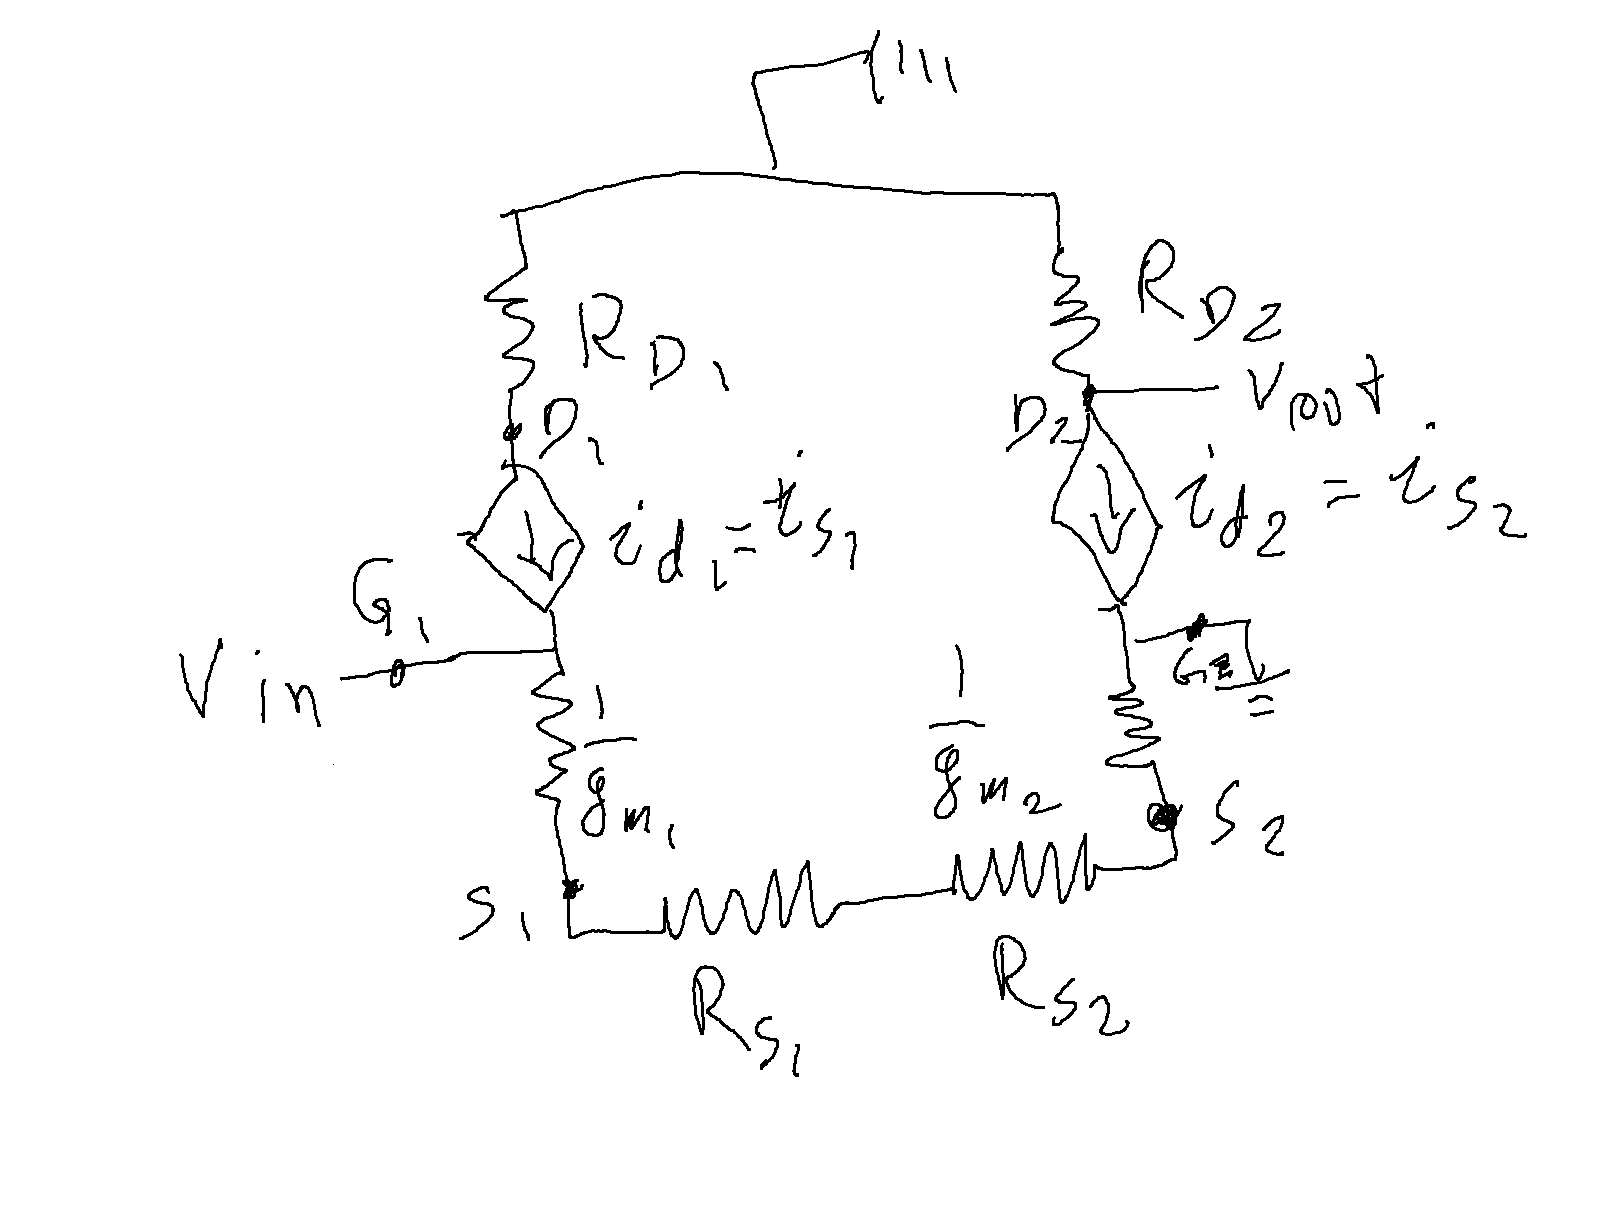

\begin{equation}
v_{out} = i_{R_{D_2}} R_{D_2} \\
i_{R_{D_2}} = i_{D_2} = i_{S_2} \\
i_{S_2} = \frac{v_{in}}{\frac{2}{g_m} + R_{S_1} + R_{S_2}} \\
v_{out} = \frac{v_{in}R_{D_2}}{\frac{2}{g_m} + R_{S_1} + R_{S_2}} \\
A_{v_2} = \frac{v_{out}}{v_{in}} = \frac{R_{D_2}}{\frac{2}{g_m} + R_{S_1} + R_{S_2}}
\end{equation}

\begin{equation}
v_{D_1} = i_{R_{D_1}}R_{D_1}\\
i_{R_{D_1}} = i_{D_1} = i_{S_1} = \frac{v_{in}}{\frac{2}{g_m} + R_{S_1} + R_{S_2}}\\
v_{D_1} = \frac{v_{in}R_{D_1}}{\frac{2}{g_m} + R_{S_1} + R_{S_2}}\\
A_{v_1}=\frac{v_{D_1}}{v_{in}} = \frac{R_{D_1}}{\frac{2}{g_m} + R_{S_1} + R_{S_2}}
\end{equation}

\begin{equation}
e^2_{n_{R_{D_1}}} = 4 k T R_{D_1}\\
e^2_{n_{R_{D_2}}} = 4 k T R_{D_2}\\
e^2_{n_{R_{S_1}}} = 4 k T R_{S_1}\\
e^2_{n_{R_{S_2}}} = 4 k T R_{S_2}\\
e^2_{n_{R_S}} = e^2_{n_{R_{S_1}}} + e^2_{n_{R_{S_2}}}\\
e^2_{n_{D_1}} = 4 k T \gamma \frac{1}{g_m}\\
e^2_{n_{D_2}} = 4 k T \gamma \frac{1}{g_m}\\
e^2_n = \frac{e^2_{n_{D_2}}}{A^2_{v_2}} + \frac{e^2_{n_{R_{D_2}}}}{A^2_{v_2}} + \frac{e^2_{n_{R_S}}}{A^2_{v_1}} + \frac{e^2_{n_{D_1}}}{A^2_{v_1}} + \frac{e^2_{n_{R_{D_1}}}}{A^2_{v_1}}
\end{equation}

__4.b)__

In [54]:
k = 1.38e-23    # Boltzmann constant (physical constant)
T = 300         # absolute temperature
kT = k * T
I_tail = 1e-3
R_D1 = 10e3
R_D2 = 10e3
R_S1 = 1e3
R_S2 = 1e3
g_m_over_I_D = 10
gamma = 2/3

g_m = g_m_over_I_D * 2 / I_tail
A_v = R_D2 / (R_S1 + R_S2 + 2/g_m)
A2_v = A_v ** 2

e2_n_R_D1 = 4 * kT * R_D1
e2_n_R_D2 = 4 * kT * R_D2
e2_n_R_S1 = 4 * kT * R_S1
e2_n_R_S2 = 4 * kT * R_S2
e2_n_R_S = e2_n_R_S1 + e2_n_R_S2
e2_n_D_1 = 4 * kT * gamma / g_m
e2_n_D_2 = 4 * kT * gamma / g_m

e2_n = (e2_n_R_D2 + e2_n_R_D2 + e2_n_R_S + e2_n_D_1 + e2_n_R_D1) / A2_v
e_n = np.sqrt(e2_n)

display(f'g_m {g_m} A_v {A_v} e_n {e_n}')

'g_m 20000.0 A_v 4.999999750000012 e_n 4.60399849497804e-09'